### 用于对比的信息

In [9]:
key = 'location_final1'
l = 0
q = 0.90
m='CNN'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_200' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 42, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 42, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 41, 16)        2064      
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 41, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 20, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 19, 16)        1040      
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 19, 16)        6

In [8]:
key = 'location_final1'
l = 0
q = 0.90
m='MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_300' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2205)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               564736    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 5

In [10]:
key = 'location_v10'
l = 0
q = 0.90
m='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 44, 64)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 44, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 48, 44, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 43, 32)        8224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 43, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 64672)             0

In [11]:
key = 'newm'
l = 0
q = 0.90
m='CNN'#'MLP'

outfile = 'results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 43, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 43, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 21, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 21, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 19, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 19, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 9, 16)        

In [ ]:
key='v11'
l = 0 #[0,5,10]
q = 0.90 # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models =['MLP']#['CNN','MLP']
print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
for m in models:
    try:
        history = pickle.load(open('results/tuning/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (m, q, l), 'rb'))
    except:
        print('no file.')
    plt.rcParams['figure.figsize'] = [8,6]
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(history[0])
    axs[0, 0].set_title("loss")
    axs[1, 0].plot(history[1])
    axs[1, 0].set_title("f1")
    axs[0, 1].plot(history[2])
    axs[0, 1].set_title("val_loss")
    axs[1, 1].plot(history[3])
    axs[1, 1].set_title("val_f1")
    plt.show()

lr = 0.00005

location_v10_CNN_0.90_0.nc


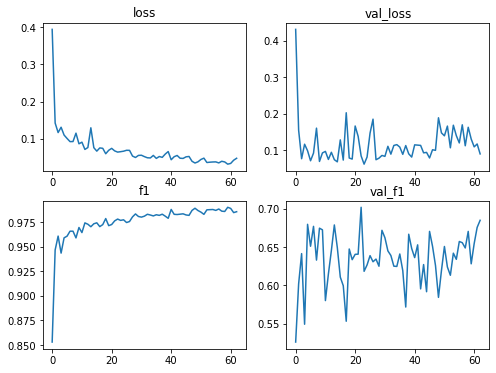

location_v10_CNN_0.90_5.nc


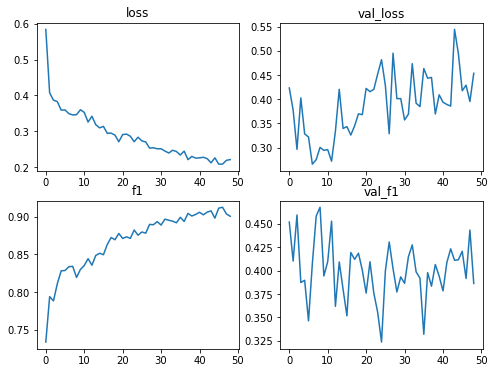

location_v10_CNN_0.90_13.nc


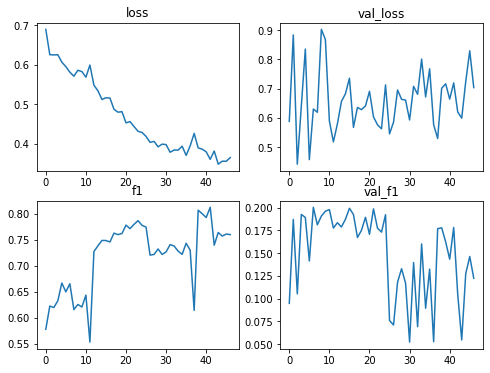

In [12]:
key = 'location_v10'
leads = [0,5,13]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

newm_CNN_0.90_0.nc


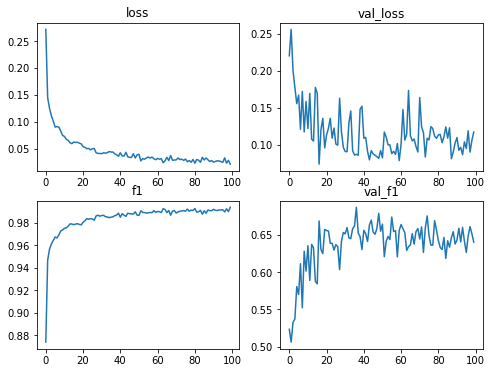

newm_CNN_0.90_5.nc


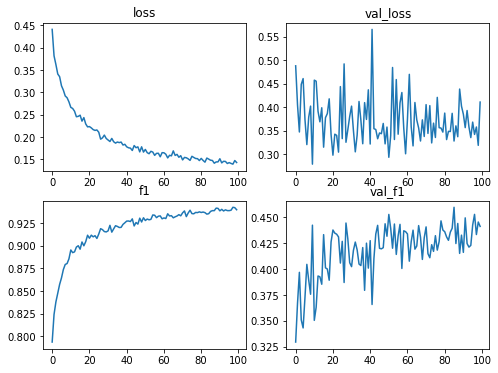

newm_CNN_0.90_10.nc


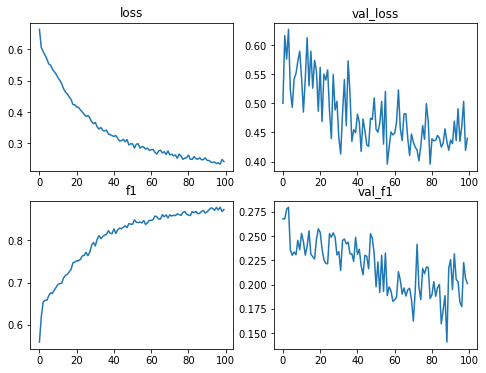

newm_CNN_0.90_13.nc


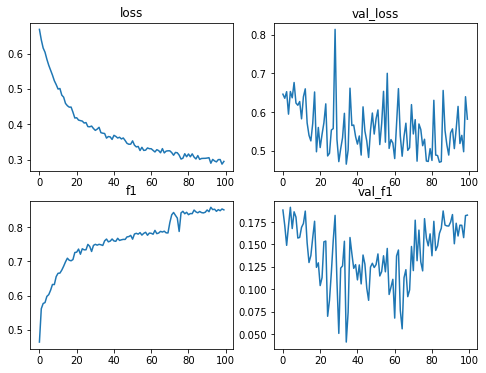

In [14]:
key = 'newm'
leads = [0,5,10,13]#[d for d in range(14)]
quantiles = [0.90] # [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
models=['CNN']#,'MLP']
for m in models:
    for q in quantiles:
        for l in leads:
            print('%s_%s_%0.2f_%d.nc' % (key, m, q, l))
            history = pickle.load(open('results/train_history_1d_precip_%s/gefs_mos_%s_%0.2f_%d_100_history.pkl' % (key, m, q, l), 'rb'))
            plt.rcParams['figure.figsize'] = [8,6]
            fig, axs = plt.subplots(2, 2)
            axs[0, 0].plot(history[0])
            axs[0, 0].set_title("loss")
            axs[1, 0].plot(history[1])
            axs[1, 0].set_title("f1")
            axs[0, 1].plot(history[2])
            axs[0, 1].set_title("val_loss")
            axs[1, 1].plot(history[3])
            axs[1, 1].set_title("val_f1")
            plt.show()

### new model

In [19]:
key = 'tuning'
l = 0
q = 0.90
m='CNN'#'MLP'

outfile = 'results/%s/gefs_mos_%s_%0.2f_%d_200' % (key, m, q, l)
model = load_model(outfile+'_bestmodel.h5', custom_objects={'f1_m': f1_m})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 44, 16)        208       
_________________________________________________________________
dropout (Dropout)            (None, 48, 44, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 22, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 21, 36)        2340      
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 21, 36)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 10, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3960)              0

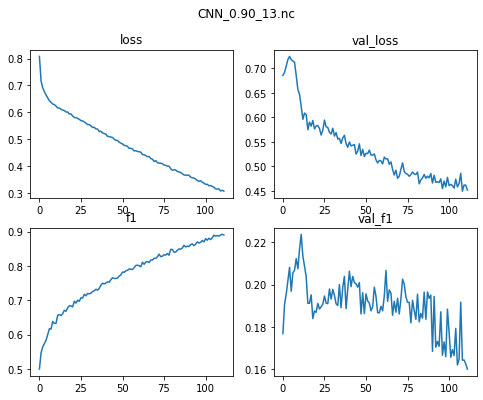

In [28]:
l = 13
q = 0.90
m = 'CNN'
history = pickle.load(open('results/train_history_tuning_cnn/gefs_mos_%s_%0.2f_%d_200_history.pkl' % (m, q, l), 'rb'))
plt.rcParams['figure.figsize'] = [8,6]
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history[0])
axs[0, 0].set_title("loss")
axs[1, 0].plot(history[1])
axs[1, 0].set_title("f1")
axs[0, 1].plot(history[2])
axs[0, 1].set_title("val_loss")
axs[1, 1].plot(history[3])
axs[1, 1].set_title("val_f1")
fig.suptitle('%s_%0.2f_%d.nc' % (m, q, l))
plt.show()

### functions

In [1]:
import numpy as np 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import datetime as dt

In [2]:
import numpy as np
import pickle
from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.optimizers import RMSprop
# from metrics import f1_m
# from models_og import create_classifier
# from models import create_classifier
from imblearn.over_sampling import RandomOverSampler

try:
    from tensorflow.keras import backend as K
except:
    pass

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.models import load_model
from vis.utils import utils